# SDG 7


1. Ensure access to affordable reliable modern energy
2. Increaase substantially the share of renewable energy 
3. Double rate of improvement in final energy consumption
4. 

https://www.forbes.com/sites/joshuarhodes/2020/09/25/even-renewables-are-bigger-in-texas/?sh=43b2253c6a9a
https://www.eia.gov/todayinenergy/detail.php?id=40252

In [1]:
from data_functions import EIA_Series

#  Texas - All renewables


<AxesSubplot:xlabel='Date'>

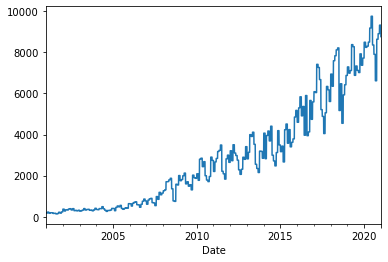

In [9]:
tx_allren = EIA_Series(
    'ELEC.GEN.AOR-TX-99.M',
    name = 'other',
    date_format='%Y%m',

)

tx_allren.frame['other'].plot()

# Wind

<AxesSubplot:xlabel='Date'>

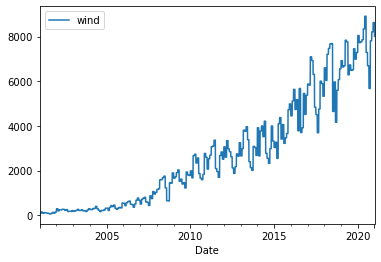

In [10]:
tx_wind = EIA_Series(
    'ELEC.GEN.WND-TX-99.M ',
    name = 'wind',
    date_format='%Y%m',
)

tx_wind.frame.plot()

# Solar

<AxesSubplot:xlabel='Date'>

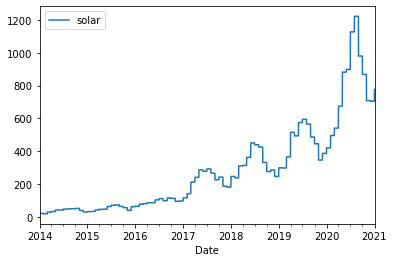

In [11]:
tx_solar = EIA_Series(
    'ELEC.GEN.TSN-TX-99.M',
    name = 'solar',
    date_format='%Y%m',
)

tx_solar.frame.plot()

In [17]:
tx_windsolar = tx_wind[['wind']]
tx_windsolar['solar']=tx_solar['solar']
tx_windsolar['solar'].fillna(0,inplace= True)
tx_windsolar.head()


,wind,solar
Date,,
2001-01-01,83.931,0.0
2001-01-02,83.931,0.0
2001-01-03,83.931,0.0
2001-01-04,83.931,0.0
2001-01-05,83.931,0.0


<AxesSubplot:xlabel='Date'>

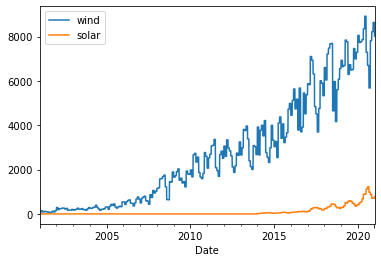

In [18]:
tx_windsolar.plot()

# All


<AxesSubplot:xlabel='Date'>

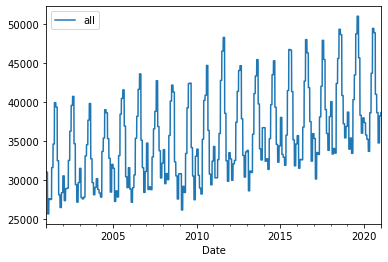

In [19]:
tx_all = EIA_Series(
    'ELEC.GEN.ALL-TX-99.M ',
    name = 'all',
    date_format='%Y%m',
)

tx_all.frame.plot()

In [20]:
tx_windsolar = tx_wind[['wind']]
tx_windsolar['solar']=tx_solar['solar']
tx_windsolar['solar'].fillna(0,inplace= True)
tx_windsolar['all']=tx_all['all']
tx_windsolar.head()

,wind,solar,all
Date,,,
2001-01-01,83.931,0.0,31001.28
2001-01-02,83.931,0.0,31001.28
2001-01-03,83.931,0.0,31001.28
2001-01-04,83.931,0.0,31001.28
2001-01-05,83.931,0.0,31001.28


<AxesSubplot:xlabel='Date'>

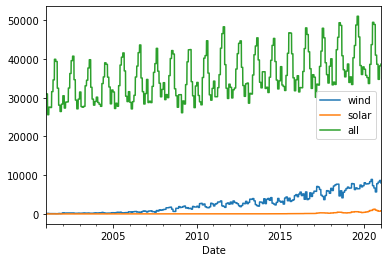

In [21]:
tx_windsolar.plot()

In [22]:
tx_merged= tx_windsolar
tx_merged['wind_perc']=(tx_merged['wind']/tx_merged['all']) * 100

<AxesSubplot:xlabel='Date'>

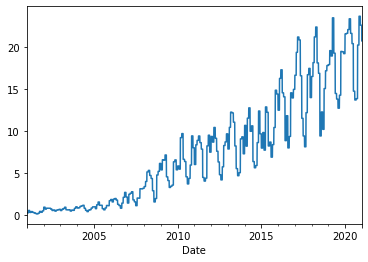

In [23]:
tx_merged['wind_perc'].plot()

# Bulk 

In [ ]:
series = {
    'us':{
        'all':'ELEC.GEN.ALL-US-99.M ',
        'wind':'ELEC.GEN.WND-US-99.M',
        'solar':
    }
}

In [ ]:
us_all = EIA_Series(
    'ELEC.GEN.ALL-TX-99.M ',
    name = 'all',
    date_format='%Y%m',
)

tx_all.frame.plot()